In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!conda install -c conda-forge bs4 --yes
from bs4 import BeautifulSoup # library to parse HTML and XML documents
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [2]:
#read master file of zomato into a dataframe
df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#India has Country Code of 1,every countrty has unique Country Code
df=df[df['Country Code']==1]
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


In [4]:
#Cities having the maximimum places associated with Zomato 
df.City.value_counts().nlargest(5)

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

In [5]:
#our city of interest is Gurgaon
df_g = df[df['City'] == 'Gurgaon']
df_g.reset_index(drop=True, inplace=True)
df_g.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",350,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",800,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
2,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",2000,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",1400,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,250,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


In [6]:
#to know the relevant columns and filter relevant ones
df_g.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
#Data cleaning:removing all 0 places having Longitude value of 0 
df_Res= df_g[df_g.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4


In [8]:
# to get the latitude and longitude for Gurgaon using Nominatim
address = 'Gurgaon'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Gurgaon are {}, {}.'.format(latitude, longitude))

#to plot the map of Gurgaon using folium
Gurgaon_map = folium.Map(location=[latitude,longitude], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

# to form clusters which we will compare later with clusters formed after using venue details from FourSquare API
kmeans = KMeans(n_clusters=3, random_state=0).fit(Z)
# assigning color to different clusters
clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Gurgaon_map)  

Gurgaon_map


The geograpical coordinate of Gurgaon are 28.42826235, 77.00270014657752.


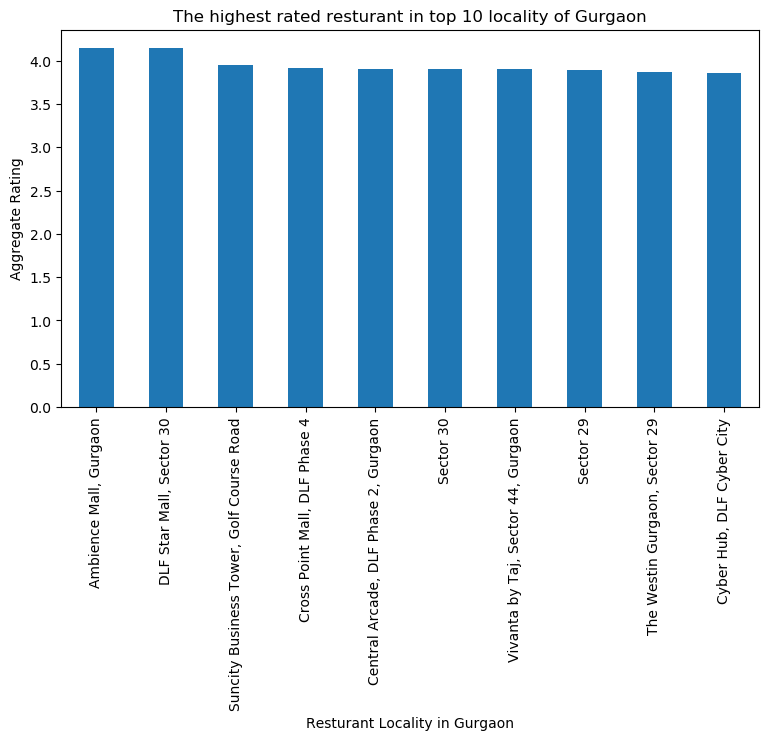

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

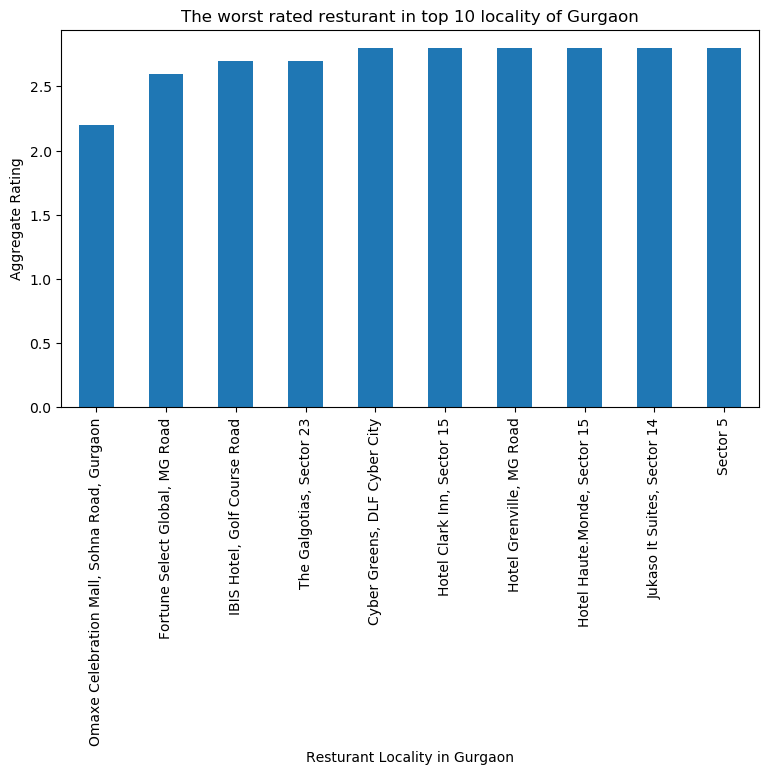

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The worst rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

In [11]:
#finding which locality has most number of food places
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10)

Locality
DLF Phase 3                  68
Cyber Hub, DLF Cyber City    41
Sector 14                    41
Sohna Road                   41
Sector 29                    38
Old Railway Road             36
Sector 31                    30
Golf Course Road             27
Sector 56                    26
MG Road                      24
Name: Restaurant Name, dtype: int64

In [12]:
#finding which locality has least number of food places
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10)

Locality
Central Arcade, DLF Phase 2, Gurgaon            1
Country Inn & Suites By Carlson, Udyog Vihar    1
Country Inn & Suites by Carlson, Gurgaon        1
Country Inn & Suites, Sohna Road                1
Courtyard by Marriott, Sushant Lok              1
Cyber Greens, DLF Cyber City                    1
DLF Phase 2                                     1
Fortune Select Global, MG Road                  1
Hotel Clark Inn, Sector 15                      1
Hotel Grenville, MG Road                        1
Name: Restaurant Name, dtype: int64

In [13]:
#the unique Cuisines available
df_Res['Cuisines'].unique()

array(['Cafe, Beverages', 'North Indian, Mughlai',
       'South Indian, Seafood, Kerala', 'Bakery', 'Ice Cream', 'Chinese',
       'Japanese, Thai, Chinese', 'Pizza, Desserts',
       'Raw Meats, Fast Food', 'Japanese',
       'North Indian, Chinese, Continental', 'Bakery, Fast Food',
       'Biryani', 'Pizza, Fast Food', 'Ice Cream, Desserts',
       'Italian, Pizza, Lebanese', 'Lebanese',
       'American, Fast Food, Salad, Healthy Food',
       'Chinese, Thai, North Indian, Japanese', 'North Indian',
       'North Indian, Fast Food', 'Cafe, Tea',
       'North Indian, Asian, Continental', 'Finger Food',
       'Continental, North Indian, Chinese',
       'Chinese, Italian, North Indian',
       'North Indian, Chinese, Italian, Continental',
       'Chinese, North Indian, Italian', 'Cafe, Belgian', 'Kashmiri',
       'Finger Food, Continental, Italian',
       'North Indian, Mughlai, Chinese, Seafood', 'Chinese, Thai, Sushi',
       'Continental, North Indian, Chinese, Italian',
   

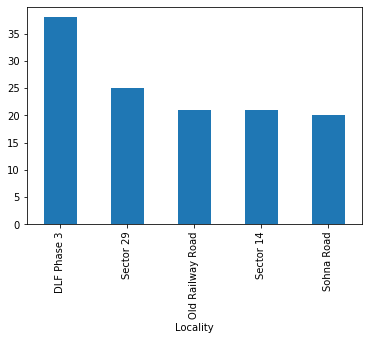

In [14]:
#locality having maximum number of places which serve North Indian Cuisine
df_Res[df_Res['Cuisines'].str.contains('North Indian')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

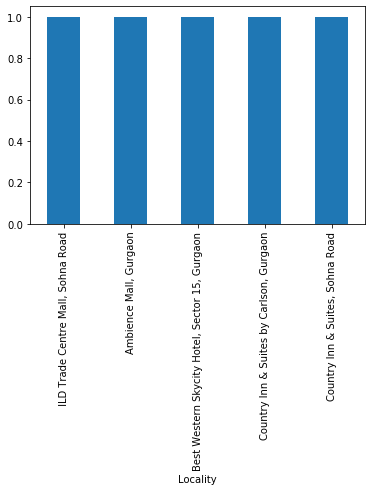

In [15]:
#locality having minimum number of places which serve North Indian Cuisine
df_Res[df_Res['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Restaurant Name'].count().nsmallest(5).plot(kind='bar')

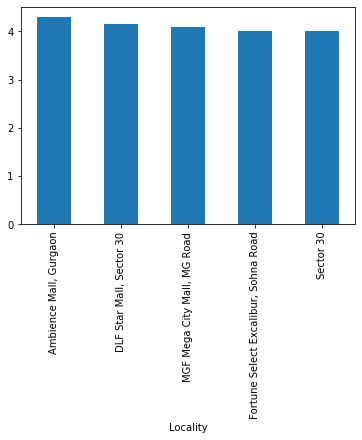

In [16]:
#locality having highest rated places which serve North Indian Cuisine
df_Res[df_Res['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

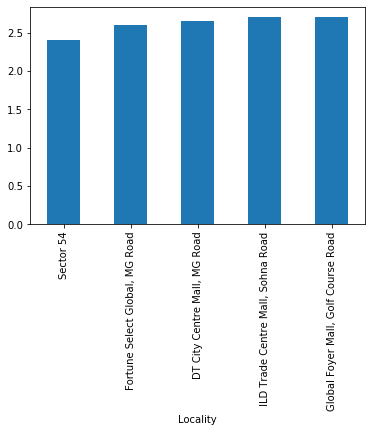

In [17]:
#locality having least rated places which serve North Indian Cuisine
df_Res[df_Res['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Aggregate rating'].mean().nsmallest(5).plot(kind='bar')

In [18]:
#grouping the data based on locality
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28


In [19]:
df_final.shape

(110, 8)

In [20]:
#Using Four Square

CLIENT_ID = 'BDJKWFXADI3254VZZ3HHPDTHO033DVRTF1A12ZIRIG1TH5UZ' # your Foursquare ID
CLIENT_SECRET = 'ASOSXJFXZCAQUHVLBCURDUWMAQJKFIYJG5XYBYCKVHC1JSJ5' # your Foursquare Secret
VERSION = '20200719' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BDJKWFXADI3254VZZ3HHPDTHO033DVRTF1A12ZIRIG1TH5UZ
CLIENT_SECRET:ASOSXJFXZCAQUHVLBCURDUWMAQJKFIYJG5XYBYCKVHC1JSJ5


In [21]:

## create a function to repeat the same process to all the Locality in Gurgaon

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# find the venues in all Gurgaon Locality
gurgaon_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )
gurgaon_venues.head()

Cyber Hub, DLF Cyber City
DLF Cyber City
DLF Galleria, DLF Phase 4
DLF Mega Mall, DLF Phase 1
DLF Phase 1
DLF Phase 2
DLF Phase 3
DLF Phase 4
DLF Phase 5
DLF South Point Mall, Golf Course Road
DLF Star Mall, Sector 30
DT City Centre Mall, MG Road
DT Mega Mall, DLF Phase 1
DoubleTree by Hilton, Sector 56
Fortune Select Excalibur, Sohna Road
Fortune Select Global, MG Road
Global Foyer Mall, Golf Course Road
Golf Course Road
Hong Kong Bazaar Mall, Sector 57, Gurgaon
Hotel Clark Inn, Sector 15
Hotel Grenville, MG Road
Hotel Haute.Monde, Sector 15
Huda City Centre Metro Station, Sector 29, Gurgaon
Hyatt Place Gurgaon
IBIS Hotel, Golf Course Road
JMD Megapolis Mall, Sohna Road
JMD Regent Arcade Mall, MG Road
Jukaso It Suites, Sector 14
Kingdom of Dreams, Sector 29
Le Meridien Gurgaon, MG Road
Leisure Inn, Sector 14, Gurgaon
Lemon Tree Premier, Sector 29
MG Road
MGF Mega City Mall, MG Road
MGF Metropolis Mall, MG Road
MGF Metropolitan Mall, MG Road
Ninex City Mart Mall, Sohna Road
Old Railway

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Brewer Street,28.424499,77.039134,Brewery
1,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Decathlon Gurgaon,28.427433,77.036258,Sporting Goods Shop
2,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Sagar Ratna,28.421042,77.038509,Indian Restaurant
3,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,KFC,28.424789,77.038722,Fast Food Restaurant
4,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Grand cinemas,28.423626,77.039422,Movie Theater


In [24]:
gurgaon_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ILD Trade Centre Mall, Sohna Road",12,12,12,12,12,12
"Ambience Mall, Gurgaon",39,39,39,39,39,39
"Ansal Plaza Mall, Palam Vihar",5,5,5,5,5,5
Ardee City,4,4,4,4,4,4
"Best Western Skycity Hotel, Sector 15, Gurgaon",5,5,5,5,5,5
"Central Arcade, DLF Phase 2, Gurgaon",22,22,22,22,22,22
"Central Plaza Mall, Golf Course Road",13,13,13,13,13,13
"Country Inn & Suites By Carlson, Udyog Vihar",7,7,7,7,7,7
"Country Inn & Suites by Carlson, Gurgaon",13,13,13,13,13,13


In [25]:
print('There are {} uniques categories.'.format(len(gurgaon_venues['Venue Category'].unique())))

There are 134 uniques categories.


In [26]:
## Analyze Each Locality

# one hot encoding
gurgaon_onehot = pd.get_dummies(gurgaon_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
gurgaon_onehot['Locality'] = gurgaon_venues['Locality'] 

# move Locality column to the first column
column_list = gurgaon_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
gurgaon_onehot = gurgaon_onehot[column_list]
gurgaon_onehot.head()

,Locality,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burmese Restaurant,Bus Station,Business Service,Cable Car,Cafeteria,Café,Campground,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Gym,Gym / Fitness Center,Health & Beauty Service,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Nightclub,Nightlife Spot,North Indian Restaurant,Office,Outdoors & Recreation,Park,Pharmacy,Pizza Place,Platform,Plaza,Pool,Portuguese Restaurant,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
gurgaon_grouped = gurgaon_onehot.groupby('Locality').mean().reset_index()
gurgaon_grouped.shape

(110, 135)

In [28]:

## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in gurgaon_grouped['Locality']:
    print("----"+hood+"----")
    temp = gurgaon_grouped[gurgaon_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ILD Trade Centre Mall, Sohna Road----
                  venue  freq
0     Indian Restaurant  0.17
1         Movie Theater  0.17
2               Brewery  0.17
3   Sporting Goods Shop  0.08
4  Fast Food Restaurant  0.08


----Ambience Mall, Gurgaon----
                  venue  freq
0     Indian Restaurant  0.15
1  Fast Food Restaurant  0.08
2        Clothing Store  0.05
3         Shopping Mall  0.05
4                  Café  0.05


----Ansal Plaza Mall, Palam Vihar----
            venue  freq
0     Pizza Place   0.4
1            Café   0.2
2             Gym   0.2
3  Sandwich Place   0.2
4             ATM   0.0


----Ardee City----
                            venue  freq
0               Convenience Store  0.25
1                     Beer Garden  0.25
2               Indian Restaurant  0.25
3                 Thai Restaurant  0.25
4  Multicuisine Indian Restaurant  0.00


----Best Western Skycity Hotel, Sector 15, Gurgaon----
                     venue  freq
0                    Hotel   

In [29]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = gurgaon_grouped['Locality']

for ind in np.arange(gurgaon_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gurgaon_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted.head(10)

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",Brewery,Movie Theater,Indian Restaurant,BBQ Joint,Shopping Mall,Fast Food Restaurant,Sporting Goods Shop,Multiplex,Department Store,Dim Sum Restaurant
1,"Ambience Mall, Gurgaon",Indian Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Café,Asian Restaurant,Multiplex,Shopping Mall,Bar,Clothing Store
2,"Ansal Plaza Mall, Palam Vihar",Pizza Place,Gym,Sandwich Place,Café,Cosmetics Shop,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Flea Market
3,Ardee City,Convenience Store,Indian Restaurant,Thai Restaurant,Beer Garden,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",Hotel,Farmers Market,Asian Restaurant,Diner,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop,Dim Sum Restaurant
5,"Central Arcade, DLF Phase 2, Gurgaon",Department Store,Indian Restaurant,Shopping Mall,Coffee Shop,Bar,Scenic Lookout,Brewery,Café,Donut Shop,Mexican Restaurant
6,"Central Plaza Mall, Golf Course Road",Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Hotel,Business Service,Sandwich Place,Café,Diner,Ice Cream Shop,Dim Sum Restaurant
7,"Country Inn & Suites By Carlson, Udyog Vihar",Clothing Store,Hotel,Fast Food Restaurant,Campground,Donut Shop,Flea Market,Farmers Market,Falafel Restaurant,Electronics Store,Dim Sum Restaurant
8,"Country Inn & Suites by Carlson, Gurgaon",Hotel,Japanese Restaurant,Resort,Café,Indian Restaurant,Go Kart Track,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
9,"Country Inn & Suites by Carlson, Sector 12",Hotel,Indian Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Diner,Dessert Shop


In [31]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 3

gurgaon_clustering = gurgaon_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gurgaon_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(110,)

In [32]:
# add clustering labels
gurgaon_merged = df_final.head(240)
gurgaon_merged['Cluster Labels'] = kmeans.labels_

# merge gurgaon_grouped with df_Chinese to add latitude/longitude for each Locality
gurgaon_merged = gurgaon_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

gurgaon_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96,0,Brewery,Movie Theater,Indian Restaurant,BBQ Joint,Shopping Mall,Fast Food Restaurant,Sporting Goods Shop,Multiplex,Department Store,Dim Sum Restaurant
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689,0,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Café,Asian Restaurant,Multiplex,Shopping Mall,Bar,Clothing Store
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19,1,Pizza Place,Gym,Sandwich Place,Café,Cosmetics Shop,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Flea Market
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65,0,Convenience Store,Indian Restaurant,Thai Restaurant,Beer Garden,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28,2,Hotel,Farmers Market,Asian Restaurant,Diner,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop,Dim Sum Restaurant


In [33]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gurgaon_merged['Lat'],gurgaon_merged['Lng'], gurgaon_merged['Locality'], gurgaon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [34]:

## Examine Clusters

## Cluster 1
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 0, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.424872,3.050000,Average,96,0,Brewery,Movie Theater,Indian Restaurant,BBQ Joint,Shopping Mall,Fast Food Restaurant,Sporting Goods Shop,Multiplex,Department Store,Dim Sum Restaurant
1,28.502845,4.150000,Very Good,2689,0,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Café,Asian Restaurant,Multiplex,Shopping Mall,Bar,Clothing Store
3,28.441660,3.000000,Average,65,0,Convenience Store,Indian Restaurant,Thai Restaurant,Beer Garden,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
5,28.480759,3.900000,Good,415,0,Department Store,Indian Restaurant,Shopping Mall,Coffee Shop,Bar,Scenic Lookout,Brewery,Café,Donut Shop,Mexican Restaurant
11,28.460925,3.200000,Average,6,0,Indian Restaurant,Hotel,Hotel Bar,Flea Market,Gym,Sandwich Place,Bakery,Diner,Chinese Restaurant,Restaurant
13,28.468424,3.800000,Good,312,0,Brewery,Indian Restaurant,Café,Chinese Restaurant,Bar,Fast Food Restaurant,Lounge,Deli / Bodega,Brazilian Restaurant,Korean Restaurant
20,28.482766,3.800000,Good,299,0,Indian Restaurant,Department Store,Brewery,Scenic Lookout,Mexican Restaurant,Bar,Bakery,Pizza Place,Gym,American Restaurant
26,28.478961,3.042857,"Average, Good",1215,0,Indian Restaurant,Shopping Mall,Fast Food Restaurant,Department Store,Coffee Shop,Pizza Place,Fried Chicken Joint,Donut Shop,Multiplex,Bowling Alley
31,28.460392,3.642857,"Average, Excellent, Good, Very Good",2637,0,Brewery,Gym,Golf Course,Indian Restaurant,Pub,Japanese Restaurant,Korean Restaurant,Yoga Studio,Diner,Farmers Market
38,28.500898,3.800000,Good,73,0,Indian Restaurant,Restaurant,Hotel,Burger Joint,Pizza Place,Bed & Breakfast,Convenience Store,Golf Course,Fast Food Restaurant,Cosmetics Shop


In [35]:
## Cluster 2
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 1, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,28.511460,3.000000,Average,19,1,Pizza Place,Gym,Sandwich Place,Café,Cosmetics Shop,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Flea Market
6,28.443040,3.500000,"Average, Good, Very Good",1214,1,Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Hotel,Business Service,Sandwich Place,Café,Diner,Ice Cream Shop,Dim Sum Restaurant
7,28.509225,3.500000,Good,32,1,Clothing Store,Hotel,Fast Food Restaurant,Campground,Donut Shop,Flea Market,Farmers Market,Falafel Restaurant,Electronics Store,Dim Sum Restaurant
12,28.468311,3.912500,"Good, Very Good",1841,1,Café,Bakery,Indian Restaurant,Coffee Shop,Sandwich Place,Italian Restaurant,Pizza Place,Beer Garden,Dessert Shop,Chinese Restaurant
14,28.493723,2.800000,Average,191,1,Indian Restaurant,Coffee Shop,Pizza Place,Café,Fast Food Restaurant,Asian Restaurant,Bar,Food Court,Mediterranean Restaurant,Donut Shop
15,28.495004,3.860976,"Average, Excellent, Good, Poor, Very Good",36185,1,Indian Restaurant,Coffee Shop,Café,Pizza Place,Asian Restaurant,Fast Food Restaurant,Bar,American Restaurant,Mexican Restaurant,Mediterranean Restaurant
16,28.492075,3.460000,"Average, Good, Poor, Very Good",1241,1,Indian Restaurant,Café,Coffee Shop,Fast Food Restaurant,Pizza Place,Bar,Tea Room,Mediterranean Restaurant,Donut Shop,Lounge
17,28.467327,3.582353,"Average, Good, Poor, Very Good",3208,1,Café,Indian Restaurant,Bakery,Coffee Shop,Sandwich Place,Italian Restaurant,Pizza Place,Beer Garden,Dessert Shop,Chinese Restaurant
18,28.475867,3.007143,"Average, Good, Poor",1033,1,Fast Food Restaurant,Health & Beauty Service,Brewery,Pizza Place,Coffee Shop,Clothing Store,Chinese Restaurant,Restaurant,Multiplex,Convenience Store
19,28.472881,3.352174,"Average, Excellent, Good",2651,1,Fast Food Restaurant,Clothing Store,Brewery,Metro Station,Multiplex,Restaurant,Chinese Restaurant,Convenience Store,Indian Restaurant,Coffee Shop


In [36]:
## Cluster 3
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 2, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,28.458165,2.8500,Average,28,2,Hotel,Farmers Market,Asian Restaurant,Diner,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop,Dim Sum Restaurant
8,28.461988,3.8000,Good,91,2,Hotel,Japanese Restaurant,Resort,Café,Indian Restaurant,Go Kart Track,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
9,28.468385,3.2500,"Average, Good",44,2,Hotel,Indian Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Diner,Dessert Shop
10,28.334942,3.4000,Average,19,2,Hotel,Food & Drink Shop,Cosmetics Shop,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop
34,28.457610,2.8000,Average,7,2,Hotel,Farmers Market,Asian Restaurant,Diner,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop,Dim Sum Restaurant
35,28.465600,2.8000,Average,15,2,Hotel,Bed & Breakfast,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner,Food & Drink Shop
45,28.470510,3.0000,Average,35,2,Hotel,Indian Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Diner,Dessert Shop
57,28.459079,3.2000,Average,13,2,Hotel,Farmers Market,Market,Dessert Shop,Diner,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop,Dim Sum Restaurant
67,28.457396,2.9600,Average,99,2,Hotel,Asian Restaurant,Department Store,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dim Sum Restaurant
71,28.503608,3.2625,"Average, Good",327,2,Hotel,Sports Club,Café,Yoga Studio,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop


In [37]:
## Cluster 4
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 4, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [38]:
## Cluster 5
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 5, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
